<a href="https://colab.research.google.com/github/AilingLiu/Statistics/blob/main/distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Binomial Distribution

Probability distribution of thenumber of successes in a sequence of independent trials

- binary outcomes
- independent trials


E.g.
Number of heads in a sequence of coin flips

Described by n and p

- n: total number of trials
- p: probability of success
- mu(expected value): n x p


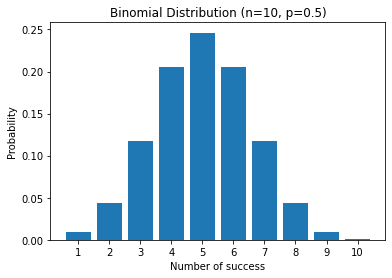

In [27]:
from scipy.stats import binom
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(1, 1)

rv = binom(n=10, p=0.5)
x=np.arange(1,11)
ax.bar(x, rv.pmf(x))
ax.set_ylabel('Probability')
ax.set_xlabel('Number of success')
ax.set_xticks(x)
ax.set_title('Binomial Distribution (n=10, p=0.5)');

In [21]:
# The corresponding number of success by percent point function 
rv.ppf(0.01)

1.0

In [10]:
# The probability of 7 heads?
rv.pmf(7)

0.11718750000000014

In [11]:
# The probability of 7 or fewer heads?
rv.cdf(7)

0.9453125

In [12]:
# The probability of more than 7 heads?
1-rv.cdf(7)

0.0546875

# Normal Distribution

- symmetrical
- total area = 1
- curve (probability) never hits 0
- described by mean and standard deviation
- 68% falss within 1 standard deviation; 95% falls within 2 standard deviations; 99.7% falls within 3 standard deviations

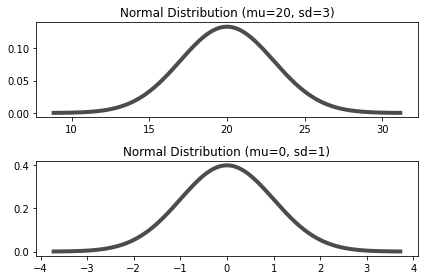

In [47]:
from scipy.stats import norm
fig, (ax1, ax2) = plt.subplots(2,1)

rv1 = norm(loc=20, scale=3)
x = np.linspace(rv1.ppf(0.0001), rv1.ppf(0.9999), 1000)
ax1.plot(x, rv1.pdf(x), color='k', alpha=0.7, linewidth=4)
ax1.set_title('Normal Distribution (mu=20, sd=3)')

rv2 = norm() # default loc=0, scale=1
x = np.linspace(rv2.ppf(0.0001), rv2.ppf(0.9999), 1000)
ax2.plot(x, rv2.pdf(x), color='k', alpha=0.7, linewidth=4)
ax2.set_title('Normal Distribution (mu=0, sd=1)')

fig.tight_layout()
fig;

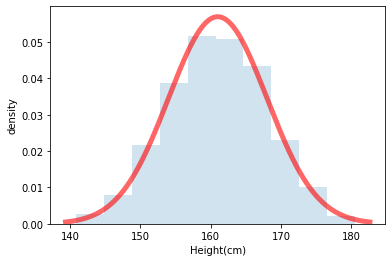

In [57]:
fig, ax = plt.subplots(1,1)

height_dist = norm(loc=161, scale=7)
x=np.linspace(height_dist.ppf(0.001), height_dist.ppf(0.999), 10000)
ax.plot(x, height_dist.pdf(x),'r-', lw=5, alpha=0.6, label='norm pdf')
ax.hist(height_dist.rvs(size=1000), density=True, histtype='stepfilled', alpha=0.2)
ax.set_xlabel('Height(cm)')
ax.set_ylabel('density')
plt.show();

In [58]:
# What percent of female population is shorter than 154 cm?

height_dist.cdf(154)

0.15865525393145707

In [59]:
# What percent of female population is taller than 154 cm?

1-height_dist.cdf(154)

0.8413447460685429

In [60]:
# What percent of female population is between 154 and 157 cm?

height_dist.cdf(157)-height_dist.cdf(154)

0.1251993291672192

In [61]:
# What height are 90% of women shorter than? -- left tail
height_dist.ppf(0.9)

169.9708609588122

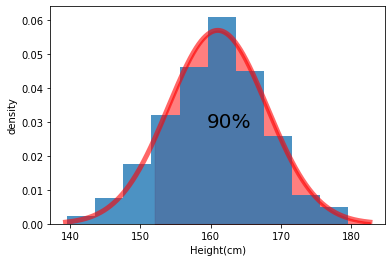

In [82]:
fig, ax = plt.subplots(1,1)

height_dist = norm(loc=161, scale=7)
x=np.linspace(height_dist.ppf(0.001), height_dist.ppf(0.999), 10000)
ax.plot(x, height_dist.pdf(x),'r-', lw=5, alpha=0.6, label='norm pdf')
ax.hist(height_dist.rvs(size=1000), density=True, histtype='stepfilled', alpha=0.8)

right_90_x = x[x>=height_dist.ppf(0.1)] 
ax.fill_between(right_90_x, height_dist.pdf(right_90_x), color='red', alpha=0.5)
ax.text(x=height_dist.mean()*0.99, y=height_dist.pdf(height_dist.mean())/2, s='90%', size=20)
ax.set_xlabel('Height(cm)')
ax.set_ylabel('density')
plt.show();

In [63]:
# What height are 90% of women taller than? -- right tail
height_dist.ppf(0.1)

152.0291390411878

In [83]:
# Generating random numbers

norm.rvs(loc=161, scale=7, size=10)

array([154.33408996, 158.60563402, 166.17138031, 157.13033522,
       156.16595175, 173.73033658, 152.83057435, 166.58420618,
       165.45510244, 155.97662004])

# Sampling Distribution (Central Limist Theorem)

Take binomial as example:

- one sample mean: rolling the dice 5 times, take the mean
- sample means: repeat 1000 times, take each sample's mean, resulting in 1000 sample means
- sampling distribution: The sampling distribution of a statistic becomes closer to the normal distribution as the number of trials increases. 


In [95]:
1000%100

0

In [111]:
from scipy.stats import uniform

sampling_means = []

for i in range(1000):
  ten_rolls_means = []
  for i in range(10):
    five_rolls_means = [uniform.rvs(loc=3.5, scale=1, size=5).astype(int).mean()]
    ten_rolls_means += five_rolls_means
  sampling_means+=[np.mean(ten_rolls_means)]
  

In [112]:
len(sampling_means)

1000

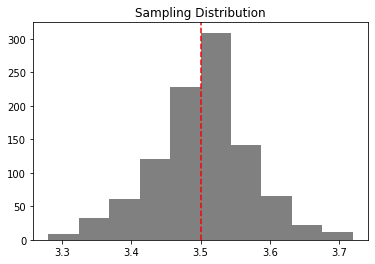

In [115]:
fig, ax = plt.subplots(1,1)

ax.hist(sampling_means, color='gray')
ax.axvline(np.mean(sampling_means), color='red', linestyle='--')
ax.set_title('Sampling Distribution')
plt.show()

In [116]:
# Estimate expected value of die
np.mean(sampling_means)

3.5002799999999996